# How to measure entropy efficiently

The Shanon entropy or information entropy is defined as


$H= -\sum_i \mu_i \log \mu_i$

$\mu_i$ is the relative size of the $i$-th string, such that $\sum_i \mu_i = 1$

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_entropy(sizes):
    """
        sizes : list size of differnt strings
    """
    N = sum(sizes)
    H = 0
    for a in sizes:
        mu = a/N
        if mu == 0:
            continue
        H += - mu * math.log(mu)
        pass
    return H

In [3]:
sizes = [random.randint(1, 100) for i in range(100)]

In [4]:
# mu_is

In [5]:
# def get_entropy(sizes):
#     """
#         sizes : list size of differnt strings
#     """
#     N = sum(sizes)
#     mu_is = [sizes[i]/N for i in range(len(sizes))]
#     H = 0
#     for mu in mu_is:
#         if mu == 0:
#             continue
#         H += - mu * math.log(mu)
#         pass
#     return H

In [6]:
get_entropy(sizes)

4.437744192739395

But when the size of the data is huge and you need to find entropy frequently (for every changes made in the configuration of the system) this process is not very efficient

In [7]:
sizes = [random.randint(1, 100) for i in range(100)]

Algorithm for run_system_for_entropy_v1

1. initial maximum entropy

2. randomly select two node or array element

3. join them. here only by adding

4. set one of them to zero so that value never gets repeated 

5. find entropy of the system by going through all nodes

This way the original 'sizes' array get replaced by new value in one element and zero in another element among the two. In the end, only one element of 'sizes' is nonzero. That non zero element is the number that we had at the begining by summing values of 'sizes' array .

In [22]:
def run_system_for_entropy_v1(sizes):
    sz = len(sizes)
    entropies = []
    H = get_entropy(sizes) # initial maximum entropy
    while H > 0:
        # randomly select two node or array element
        i = random.randint(0, len(sizes)-1)
        j = random.randint(0, len(sizes)-1)
        if i == j:
            continue
        if i != j and (sizes[i] != 0 or sizes[j] != 0):
            sz -= 1
            pass
        # join them. here only by adding
        sizes[i] = sizes[i] + sizes[j]
        sizes[j] = 0 # set one of them to zero so that value never gets repeated 
        H = get_entropy(sizes) # find entropy of the system by going through all nodes
        if len(entropies) == 0:
            entropies.append(H)
        elif H < entropies[-1]:
            # record value only if entropy is decreasing
            entropies.append(H)
#         print(H)
        pass
    return entropies

5052
5052


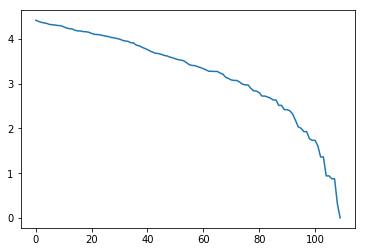

In [23]:
sizes = [random.randint(1, 100) for i in range(100)]
print(np.sum(sizes))
out = run_system_for_entropy_v1(sizes)
# print(out)
print(np.sum(sizes))
# print(sizes)
plt.plot(np.arange(len(out)), out)

Algorithm for run_system_for_entropy_v2

Using auxiliary 'indices' array so that values of 'sizes' array does not get replaced.

1. initial maximum entropy

2. randomly select two node or array element

3. join them. here only by adding

4. set one of them to zero so that value never gets repeated 

5. find entropy of the system by going through all nodes



In [28]:
def run_system_for_entropy_v2(sizes):
    sz = len(sizes)
    indices = list(range(sz))
    entropies = []
    H = get_entropy(sizes) # initial maximum entropy
    k = 0
    while k < sz-1:
        i = random.randint(k, sz-1)
        j = random.randint(k, sz-1)
        a, b = indices[i], indices[j]
        if a == b:
            # same index does not help
            continue
        
        sizes[a] = sizes[b] + sizes[a]
        sizes[b] = 0 # b or indices[j] will never be used
        indices[j] = indices[k] # replace indices[j] with indices[k] to keep it unique
        k += 1

        H = get_entropy(sizes)
        entropies.append(H)
#         print(H)
        pass
    return entropies

4549
4549


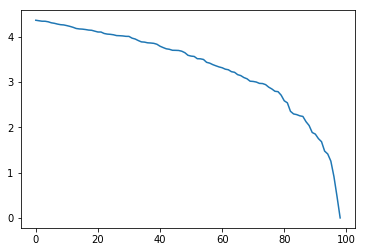

In [30]:
sizes = [random.randint(1, 100) for i in range(100)]
print(np.sum(sizes))
out = run_system_for_entropy_v2(sizes)
# print(out)
print(np.sum(sizes))
# print(sizes)
plt.plot(np.arange(len(out)), out)

In [16]:
def run_system_for_entropy_v3(sizes):
    indices = list(range(len(sizes)))
    entropies = []
    sz = len(indices)
    N = np.sum(sizes)
    H_max = get_entropy(sizes) # initial maximum entropy
    entropies.append(H_max)
    print(H_max)
    H = H_max
    k = 0
    while k < sz-1:
        i = random.randint(k, sz-1)
        j = random.randint(k, sz-1)
        
        if i == j:
            continue
            
        a, b = indices[i], indices[j]
        indices[j] = indices[k] # j-th element is replaced by k-th element
        k += 1

        # subtract for old clusters
        H += np.log(sizes[a]/N)*sizes[a]/N 
        if a != b:
            H += np.log(sizes[b]/N)*sizes[b]/N
            pass
        sizes[a] = sizes[b] + sizes[a]
        # add for new cluster
        H += (-np.log(sizes[a]/N)*sizes[a]/N)
        sizes[b] = 0 # so that it is never used again
        
        entropies.append(H)
#         print(H)
        pass
    return entropies

4.410084134264003
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4933, 0, 0, 0, 0]


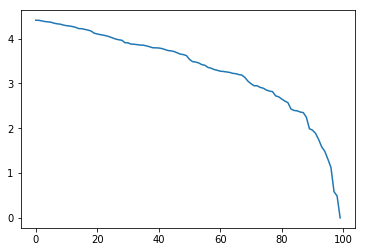

In [17]:
sizes = [random.randint(1, 100) for i in range(100)]
out = run_system_for_entropy_v3(sizes)
# print(out)
print(sizes)
plt.plot(np.arange(len(out)), out)

### Choose two element randomly from an array, use up one of them (not to be used again)

Organise the array at each iteration in such a way that the used value never get repeated.

Element with index greater or equals k is always unique and usable

In [77]:
def choose_not_to_repeate_test(size):
    indices = list(range(size))
    k = 0
    while k < size-1:
        print("step ", k)
        i = random.randint(k, size-1)
        j = random.randint(k, size-1)
        if i == j:
            continue
        print("selected : ", indices[i], ", ", indices[j])
        print("used     : ", indices[j]) # j-th element is used
        indices[j] = indices[k] # j-th element is replaced by k-th element
        k += 1
        print("full:   ", indices)
        print("unique: ", indices[k:])
#         print(H)
        pass

In [78]:
choose_not_to_repeate_test(10)

step  0
selected :  4 ,  7
used     :  7
full:    [0, 1, 2, 3, 4, 5, 6, 0, 8, 9]
unique:  [1, 2, 3, 4, 5, 6, 0, 8, 9]
step  1
selected :  3 ,  1
used     :  1
full:    [0, 1, 2, 3, 4, 5, 6, 0, 8, 9]
unique:  [2, 3, 4, 5, 6, 0, 8, 9]
step  2
selected :  3 ,  4
used     :  4
full:    [0, 1, 2, 3, 2, 5, 6, 0, 8, 9]
unique:  [3, 2, 5, 6, 0, 8, 9]
step  3
step  3
selected :  6 ,  2
used     :  2
full:    [0, 1, 2, 3, 3, 5, 6, 0, 8, 9]
unique:  [3, 5, 6, 0, 8, 9]
step  4
selected :  5 ,  8
used     :  8
full:    [0, 1, 2, 3, 3, 5, 6, 0, 3, 9]
unique:  [5, 6, 0, 3, 9]
step  5
selected :  6 ,  9
used     :  9
full:    [0, 1, 2, 3, 3, 5, 6, 0, 3, 5]
unique:  [6, 0, 3, 5]
step  6
step  6
step  6
selected :  6 ,  3
used     :  3
full:    [0, 1, 2, 3, 3, 5, 6, 0, 6, 5]
unique:  [0, 6, 5]
step  7
selected :  5 ,  0
used     :  0
full:    [0, 1, 2, 3, 3, 5, 6, 0, 6, 5]
unique:  [6, 5]
step  8
selected :  6 ,  5
used     :  5
full:    [0, 1, 2, 3, 3, 5, 6, 0, 6, 6]
unique:  [6]


In [162]:
def choose_not_to_repeate(indices, k):
    """
    last value is and element of indices array that will never be repeated again
    """
    size = len(indices)
    while k < size-1:
#         print("step ", k)
        i = random.randint(k, size-1)
        j = random.randint(k, size-1)
        if i == j:
            continue
            pass
        a, b = indices[i], indices[j]
#         print("selected : ", indices[i], ", ", indices[j])
#         print("used     : ", indices[j]) # j-th element is used
        indices[j] = indices[k] # j-th element is replaced by k-th element
        k += 1
#         print("full:   ", indices)
#         print("unique: ", indices[k:])
#         print(H)
        return indices, a, b
    print("end of indices")
    return indices,-1,-1

In [163]:
indices = list(range(10))
k = 0

In [173]:
indices, a, b = choose_not_to_repeate(indices, k)
k += 1
print(a, ",", b)

end of indices
-1 , -1


In [175]:
print("Demonstration of non repeating values")
indices = list(range(10))
for k in range(10):
    indices, a, b = choose_not_to_repeate(indices, k)
    print(b)
    pass

Demonstration of non repeating values
1
8
5
2
4
0
3
9
7
end of indices
-1
